
## Task 1 Prediction using Supervised ML


### GRIP The Sparks Foundation
---
#### In this task we will use linear regression and predict percentage of a student scored on basis of number of hours they studied.It involves only two variables

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [9]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing Dataset
df=pd.read_csv('C:\\Users\\admin\\Documents\\Sparks foundation\\Book1.csv',encoding='utf-8')

In [3]:
# printing data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# checking description of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# checking skewnness
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [11]:
# checking null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Preparing data

In [43]:
# Feature 
x=df ['Hours']

In [44]:
# Target
y=df ['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

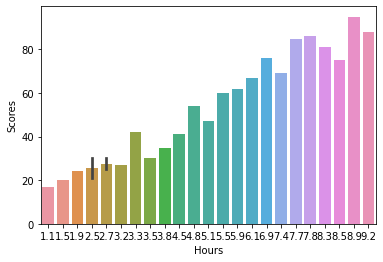

In [14]:
sns.barplot(x,y,data=df)

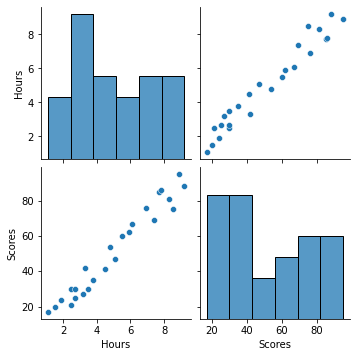

In [14]:
sns.pairplot(df)

<AxesSubplot:>

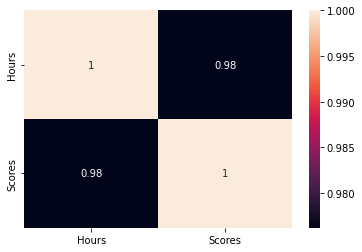

In [17]:
# checking correlation 
sns.heatmap(df.corr(),annot=True)

### Model Training

In [27]:
#  Adding constant 
x_train=sm.add_constant(X_train)

In [28]:
results = sm.OLS(y_train,x_train).fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           2.79e-13
Time:                        09:04:54   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
Hours          9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
results.params

const    2.018160
Hours    9.910656
dtype: float64

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [35]:
a=X_train.values.reshape(-1,1)
b=y_train.values.reshape(-1,1)

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
c=regressor.fit(a,b) 


In [48]:
#line = regressor.coef_*X+regressor.intercept_
Y=9.910656*x+2.018160

<IPython.core.display.Javascript object>


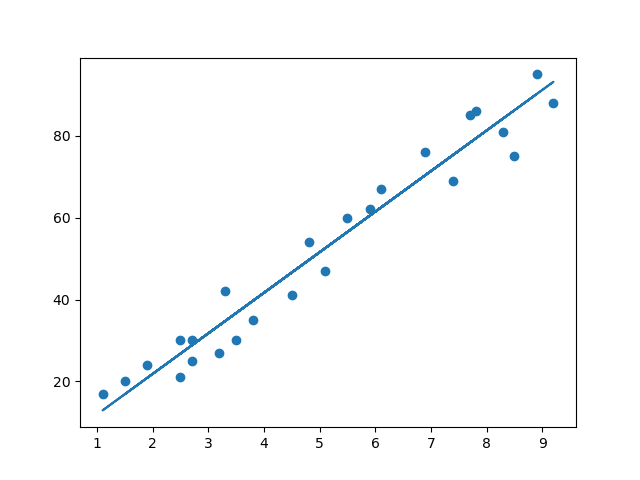

In [50]:
# Plotting for the test data
%matplotlib notebook
plt.scatter(x, y)
plt.plot(x,Y);
plt.show()

## Predictions

In [37]:
s=(c.predict(X_test.values.reshape(-1,1)))

In [38]:
from sklearn.metrics import r2_score
r2_score(s,y_test)*100

95.46785947197246

In [51]:
# checking actual and predicted value
df2 = pd.DataFrame()
df2["Actual"]=y_test
df2['Predict']=s

In [52]:
df2

,Actual,Predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Evaluate model

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
#Mean absolute error (Value closer to Zero better)
mae = mean_absolute_error(y_test, s)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 4.18


In [55]:
#Mean absolute error (Value closer to Zero better)
mse = mean_squared_error(y_test,s)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 21.60


In [57]:
#Mean absolute error (Value closer to Zero better)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 4.65
